In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import wave
import IPython
from scipy import signal
from scipy.fft import fft
from scipy.io import wavfile
from math import e, pi
from scipy.signal import spectrogram, freqz

# ISS Projekt 2021/2022 

## 4.1 Základy

In [2]:
# načítání signálu
data, fs = sf.read('../audio/xkachy00.wav')
dataspec = data
t = np.arange(data.size) / fs
data = data[:43008]
print(data)       # vzorky
print(data.min()) # minimální hodnota
print(data.max()) # maximální hodnota
print(data.size)  # počet vzorků

[ 0.00387573  0.01119995  0.01217651 ...  0.00595093  0.00296021
 -0.0022583 ]
-0.114044189453125
0.17926025390625
43008


In [3]:
# původní nahrávka
IPython.display.display(IPython.display.Audio(data, rate=fs))

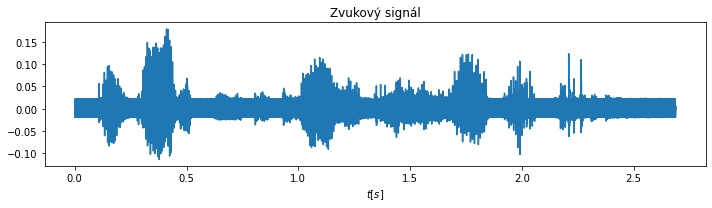

In [4]:
# zobrazení signálu 
plt.figure(figsize=(10,3))
plt.plot(t, data)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()

## 4.2 Předzpracování a rámce

In [5]:
# ustřednění a normalizace signálu
data = data - np.mean(data)
data = data / np.abs(data).max()
# hodnoty normalizovaného signálu v intervalu y = < -1 , 1 >
print(data)

[ 0.0216412   0.06249836  0.06794598 ...  0.03321739  0.01653405
 -0.01257668]


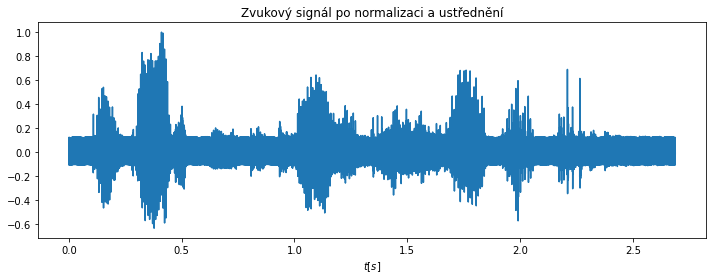

In [6]:
# zobrazení normalizovaného signálu
plt.figure(figsize=(10,4))
t_normalized = np.arange(data.size)/fs
plt.plot(t_normalized, data)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál po normalizaci a ustřednění')
plt.tight_layout()

In [7]:
# rozdělení na rámce
begin = 0 # začátek rámce
end = 1024 # konec rámce 
frames = [] # pole pro rámce

# Výpočet celkového počtu rámců
for i in range(83):
    val = data[begin:end]
    frames.append(val)
    begin += 512
    end += 512
    
    

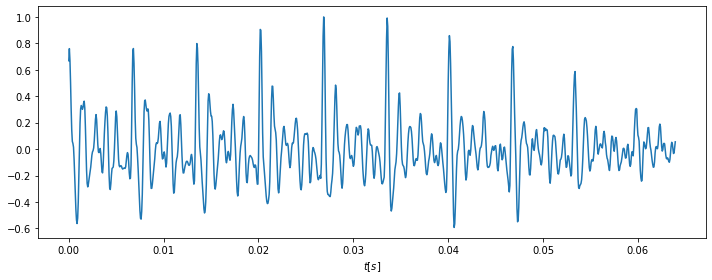

In [8]:
# zobrazení znělého rámce
t3 = np.arange(1024)/fs
plt.figure(figsize=(10,4))
plt.plot(t3, frames[12])
plt.gca().set_xlabel('$t[s]$')
plt.tight_layout()

## 4.3 Diskrétní Fourierova Transformace

### NumPy funkce - pro jeden rámec

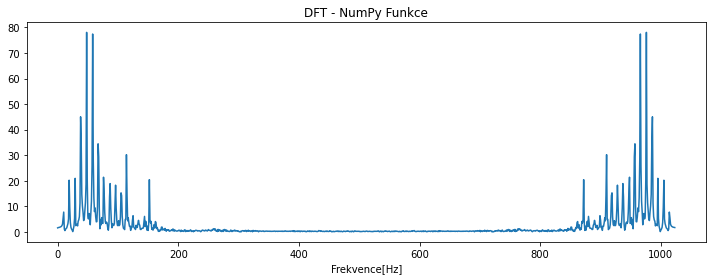

In [9]:
N = data.size
data_dft = np.fft.fft(frames[12])
G = 10 * np.log10(1/N * np.abs (data_dft)**2)
t_dft = np.arange(1024)

plt.figure(figsize=(10,4))
plt.plot(t_dft, abs(data_dft))
plt.gca().set_xlabel('Frekvence[Hz]')
plt.gca().set_title('DFT - NumPy Funkce')
plt.tight_layout()

### Vlastní funkce - pro jeden rámec

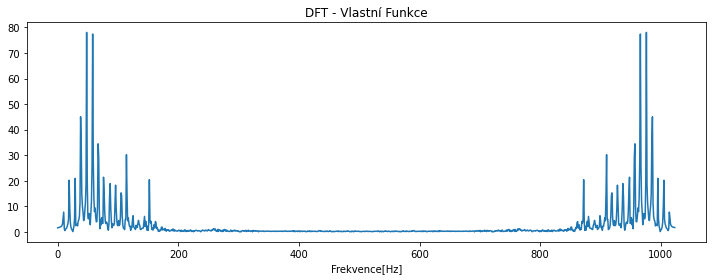

In [10]:
x = frames[12]
N = x.shape[0]
n = np.arange(N)
k = n.reshape((N,1))
M = np.exp(-2j * np.pi * k * n / N)
DFT_log_one_frame = np.dot(M,x)

plt.figure(figsize=(10,4))
plt.plot(t_dft, abs(DFT_log_one_frame))
plt.gca().set_title('DFT - Vlastní Funkce')
plt.gca().set_xlabel('Frekvence[Hz]')
plt.tight_layout()

### NumPy funkce - celý signál

In [11]:
DFT_log2 = []
DFT2 = []
for frame in range(83): # Pro každý rámec
    npy = np.fft.fft(frames[frame])
    DFT_log2.append(npy)
    DFT2.append(npy)
    Val2 = 10 * np.log10(np.abs(DFT2[frame])**2)
    DFT_log2[frame] = Val2
    DFT_log2[frame] = DFT_log2[frame][:512]

### Vlastní funkce - celý signál

In [12]:
DFT_log = []
for frame in range(83): # pro každý rámec
    x = frames[frame]
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    DFT_log.append(np.dot(M,x))
    
    Val = 10 * np.log10(np.abs(DFT_log[frame])**2) # úprava koeficientů pro spektrogram
    DFT_log[frame] = Val
    DFT_log[frame] = DFT_log[frame][:512]

## 4.4 Spektrogram

### DFT NumPy funkce

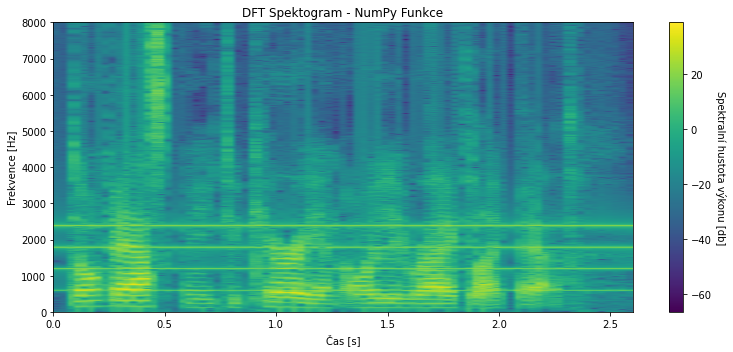

In [13]:
plt.figure(figsize=(11,5))
plt.imshow(np.rot90(DFT_log2), extent = [0,2.6,0,8000], aspect = 'auto')
plt.gca().set_title('DFT Spektogram - NumPy Funkce')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [db]', rotation=270, labelpad=15)
plt.tight_layout()

### Vlastní funkce

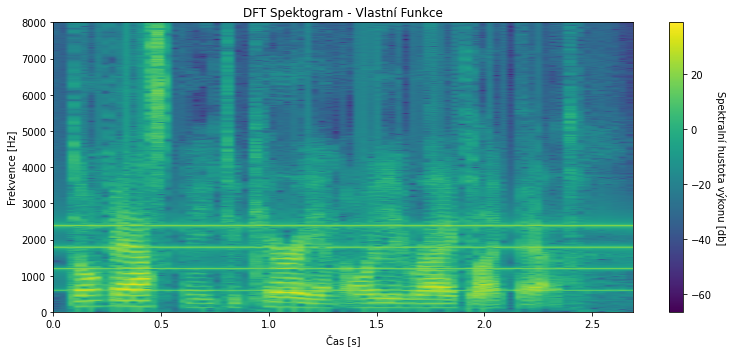

In [14]:
plt.figure(figsize=(11,5))
plt.imshow(np.rot90(DFT_log), extent = [0,2.688,0,8000], aspect = 'auto')
plt.gca().set_title('DFT Spektogram - Vlastní Funkce')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [db]', rotation=270, labelpad=15)
plt.tight_layout()

### NumPy Funkce Spectrogram

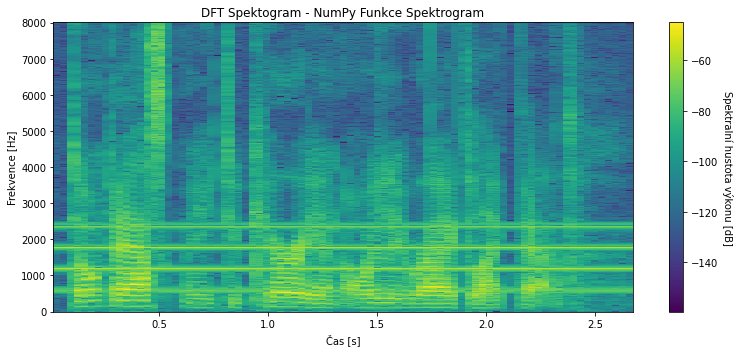

In [15]:
# tvorba spektrogramu funkcí "spectrogram"
fa, ta, sfgra = spectrogram(dataspec, fs, nperseg=1024, noverlap=512)
sfgr_loga = 10 * np.log10(sfgra+1e-20)
plt.figure(figsize=(11,5))
plt.pcolormesh(ta,fa,sfgr_loga)
plt.gca().set_title('DFT Spektogram - NumPy Funkce Spektrogram')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()

## 4.5 Určení rušivých frekvencí

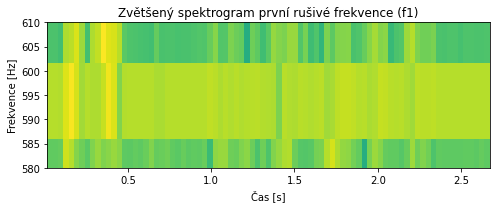

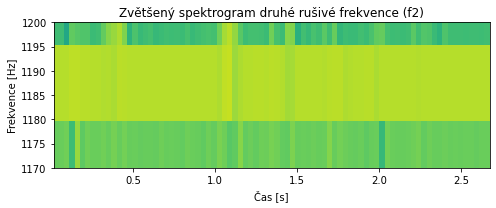

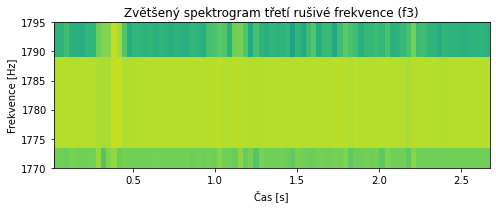

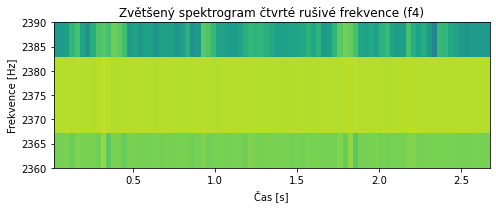

In [16]:
fa, ta, sfgra = spectrogram(dataspec, fs, nperseg=1024, noverlap=512)
sfgr_loga = 10 * np.log10(sfgra+1e-20)
plt.figure(figsize=(7,3))
plt.pcolormesh(ta,fa,sfgr_loga)
plt.gca().set_title('Zvětšený spektrogram první rušivé frekvence (f1)')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.ylim([580, 610])
plt.tight_layout()

fa, ta, sfgra = spectrogram(dataspec, fs, nperseg=1024, noverlap=512)
sfgr_loga = 10 * np.log10(sfgra+1e-20)
plt.figure(figsize=(7,3))
plt.pcolormesh(ta,fa,sfgr_loga)
plt.gca().set_title('Zvětšený spektrogram druhé rušivé frekvence (f2)')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.ylim([1170, 1200])
plt.tight_layout()

fa, ta, sfgra = spectrogram(dataspec, fs, nperseg=1024, noverlap=512)
sfgr_loga = 10 * np.log10(sfgra+1e-20)
plt.figure(figsize=(7,3))
plt.pcolormesh(ta,fa,sfgr_loga)
plt.gca().set_title('Zvětšený spektrogram třetí rušivé frekvence (f3)')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.ylim([1770, 1795])
plt.tight_layout()

fa, ta, sfgra = spectrogram(dataspec, fs, nperseg=1024, noverlap=512)
sfgr_loga = 10 * np.log10(sfgra+1e-20)
plt.figure(figsize=(7,3))
plt.pcolormesh(ta,fa,sfgr_loga)
plt.gca().set_title('Zvětšený spektrogram čtvrté rušivé frekvence (f4)')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.ylim([2360, 2390])
plt.tight_layout()

## 4.6 Generování signálu

In [17]:
ts = np.arange(43008)
ts = ts / 16000

f1 = 594
f2 = 1188
f3 = 1782
f4 = 2376

output_cos1 = np.cos(2 * np.pi * f1 * ts)
output_cos2 = np.cos(2 * np.pi * f2 * ts)
output_cos3 = np.cos(2 * np.pi * f3 * ts)
output_cos4 = np.cos(2 * np.pi * f4 * ts)

# sečtení všech 4 cosinusovek, normalizování a vynásobení maximální hodnotou integeru
output_cos_total = output_cos1 + output_cos2 + output_cos3 + output_cos4
output_cos_total = output_cos_total / np.abs(output_cos_total).max()
output_cos_total = output_cos_total * np.iinfo(np.int16).max

In [18]:
wavfile.write("../audio/4cos.wav", fs , output_cos_total.astype(np.int16))

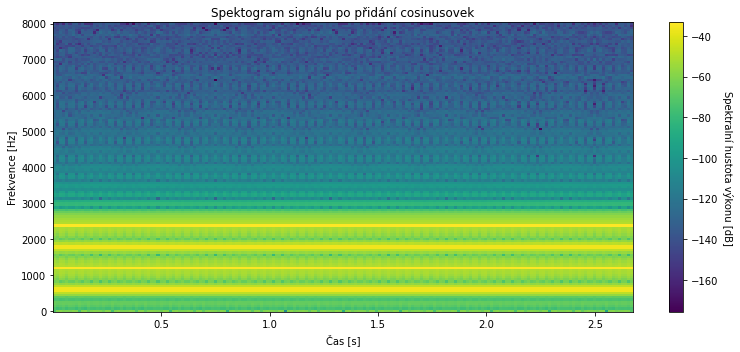

In [19]:
datae, fse = sf.read('../audio/4cos.wav')
f, t, sgr = spectrogram(datae,16000)
sgr_log = 10 * np.log10(sgr+1e-20)
plt.figure(figsize=(11,5))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
plt.gca().set_title('Spektogram signálu po přidání cosinusovek')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()

In [20]:
IPython.display.display(IPython.display.Audio(datae, rate=fs))

## 4.7 Filtrování signálu

In [21]:
N_cos1, Wn_cos1 = signal.buttord([f1-50,f1+50], [f1-15,f1+15], 3,40, 8000 )
N_cos2, Wn_cos2 = signal.buttord([f2-50,f2+50], [f2-15,f2+15], 3,40, 8000 )
N_cos3, Wn_cos3 = signal.buttord([f3-50,f3+50], [f3-15,f3+15], 3,40, 8000 )
N_cos4, Wn_cos4 = signal.buttord([f4-50,f4+50], [f4-15,f4+15], 3,40, 8000 )

In [22]:
b_cos1, a_cos1 = signal.butter(N_cos1, Wn_cos1/8000, 'bandstop')
w_cos1, h_cos1 = signal.freqz(b_cos1,a_cos1)
z1, p1, k1 = signal.tf2zpk(b_cos1, a_cos1)

b_cos2, a_cos2 = signal.butter(N_cos2, Wn_cos2/8000, 'bandstop')
w_cos2, h_cos2 = signal.freqz(b_cos2,a_cos2)
z2, p2, k2 = signal.tf2zpk(b_cos2, a_cos2)

b_cos3, a_cos3 = signal.butter(N_cos1, Wn_cos3/8000, 'bandstop')
w_cos3, h_cos3 = signal.freqz(b_cos3,a_cos3)
z3, p3, k3 = signal.tf2zpk(b_cos3, a_cos3)

b_cos4, a_cos4 = signal.butter(N_cos1, Wn_cos4/8000, 'bandstop')
w_cos4, h_cos4 = signal.freqz(b_cos4,a_cos4)
z4, p4, k4 = signal.tf2zpk(b_cos4, a_cos4)

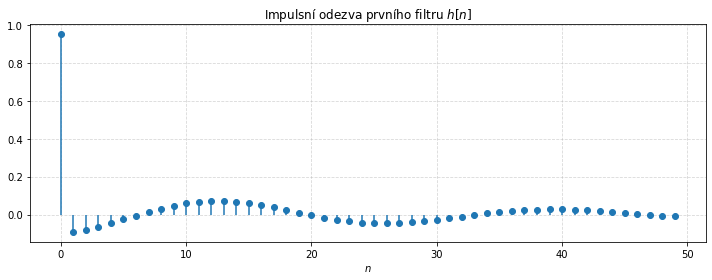

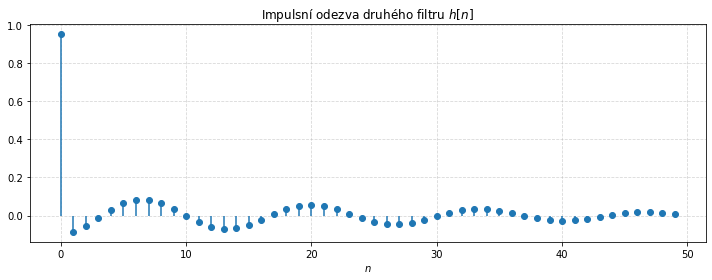

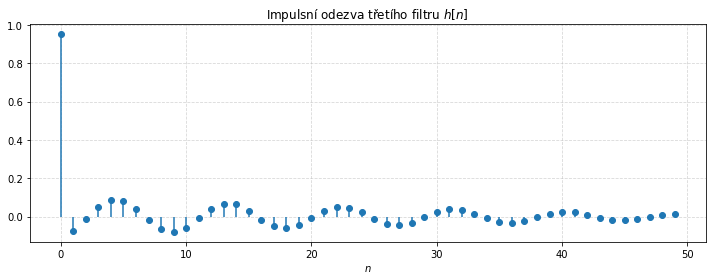

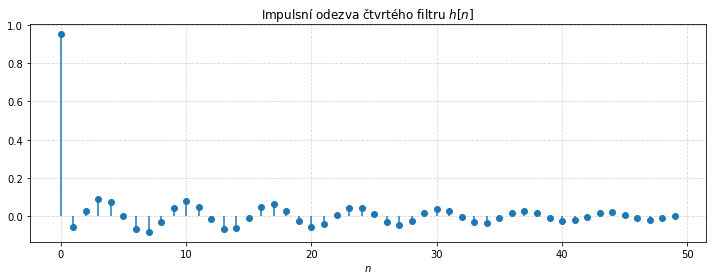

In [23]:
# impulsni odezva
N_imp = 50
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls

h1 = signal.lfilter(b_cos1, a_cos1, imp)
plt.figure(figsize=(10,4))
plt.stem(np.arange(N_imp), h1, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva prvního filtru $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

h2 = signal.lfilter(b_cos2, a_cos2, imp)
plt.figure(figsize=(10,4))
plt.stem(np.arange(N_imp), h2, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva druhého filtru $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

h3 = signal.lfilter(b_cos3, a_cos3, imp)
plt.figure(figsize=(10,4))
plt.stem(np.arange(N_imp), h3, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva třetího filtru $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

h4 = signal.lfilter(b_cos4, a_cos4, imp)
plt.figure(figsize=(10,4))
plt.stem(np.arange(N_imp), h4, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva čtvrtého filtru $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

## 4.8 Nuly a póly

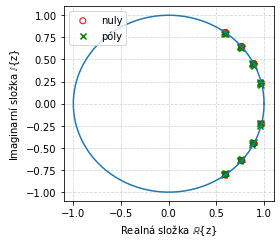

In [24]:
plt.figure(figsize=(4,3.5))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z1), np.imag(z1), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p1), np.imag(p1), marker='x', color='g', label='póly')

plt.scatter(np.real(z2), np.imag(z2), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p2), np.imag(p2), marker='x', color='g')

plt.scatter(np.real(z3), np.imag(z3), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p3), np.imag(p3), marker='x', color='g')

plt.scatter(np.real(z4), np.imag(z4), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p4), np.imag(p4), marker='x', color='g')

plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')


plt.tight_layout()

## 4.9 Frekvenční charakteristika

Text(0, 0.5, 'Intenzita')

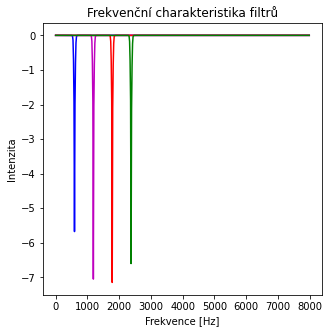

In [25]:
plt.figure(figsize=(5,5))
w_1 = w_cos1/np.pi*8000 
h_1 = np.log10(abs(h_cos1))
plt.plot( w_1, h_1, 'b')

w_2 = w_cos2/np.pi*8000 
h_2 = np.log10(abs(h_cos2))
plt.plot( w_2, h_2, 'm')

w_3 = w_cos3/np.pi*8000 
h_3 = np.log10(abs(h_cos3))
plt.plot( w_3, h_3, 'r')

w_4 = w_cos4/np.pi*8000 
h_4 = np.log10(abs(h_cos4))
plt.plot( w_4, h_4, 'g')

plt.title('Frekvenční charakteristika filtrů')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Intenzita')

### + modul a argument prvního filtru 

Text(0.5, 1.0, 'Argument fr.char. 1. filtru $\\mathrm{arg}\\ H(e^{j\\omega})$')

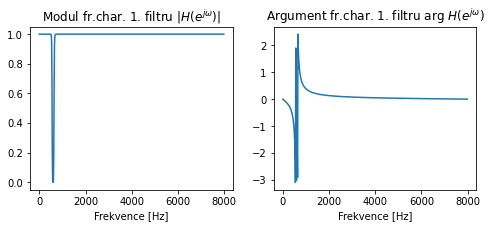

In [26]:
_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w_cos1 / 2 / np.pi * fs, np.abs(h_cos1))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul fr.char. 1. filtru $|H(e^{j\omega})|$')

ax[1].plot(w_cos1 / 2 / np.pi * fs, np.angle(h_cos1))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument fr.char. 1. filtru $\mathrm{arg}\ H(e^{j\omega})$')

## 4.10 Filtrace

### prvním filtrem

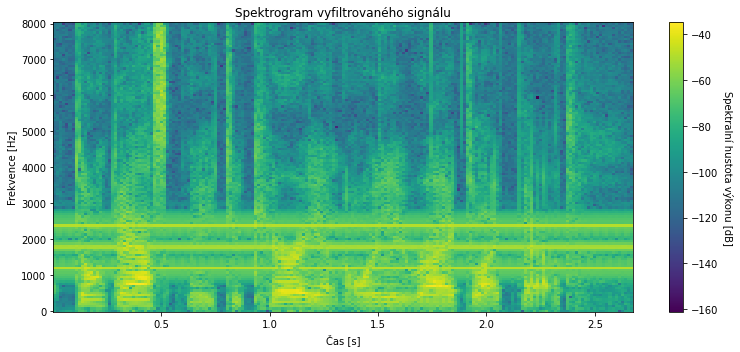

In [27]:
sf1 = signal.lfilter(b_cos1, a_cos1, data)
f, t, sfgr = spectrogram(sf1, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)

plt.figure(figsize=(11,5))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)


plt.tight_layout()

### druhým filtrem

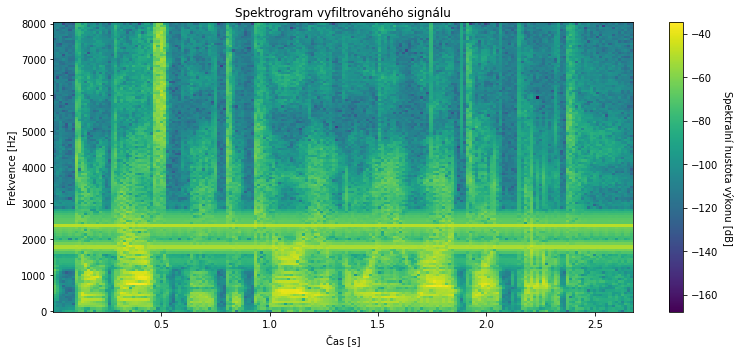

In [28]:
sf2 = signal.lfilter(b_cos2, a_cos2, sf1)

f, t, sfgr = spectrogram(sf2, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)

plt.figure(figsize=(11,5))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

### třetím filtrem

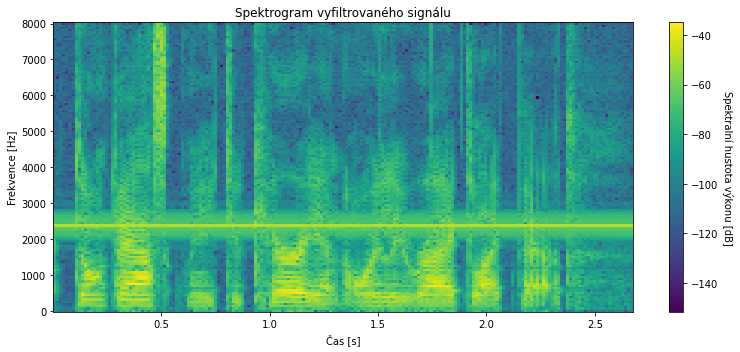

In [29]:
sf3 = signal.lfilter(b_cos3, a_cos3, sf2)

f, t, sfgr = spectrogram(sf3, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)

plt.figure(figsize=(11,5))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

### čtvrtým filtrem

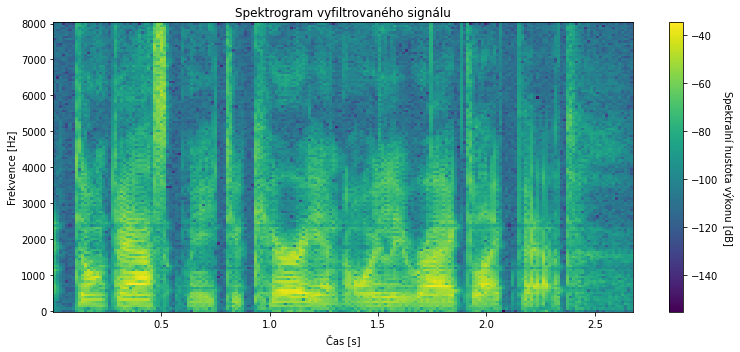

In [30]:
sf4 = signal.lfilter(b_cos4, a_cos4, sf3)
f, t, sfgr = spectrogram(sf4, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)

plt.figure(figsize=(11,5))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

### Následná kontrola výsledného signálu

In [31]:
IPython.display.display(IPython.display.Audio(sf4, rate=fs))

In [32]:
sf.write("../audio/clean_bandstop.wav", sf4, fs)

In [33]:
data, fs = sf.read('../audio/clean_bandstop.wav')
data = data[:43008]
t = np.arange(data.size) / fs

np.pad(data, (0, 1024), 'edge')
print(data)       # vzorky
print(data.min()) # minimální hodnota
print(data.max()) # maximální hodnota
print(data.size)  # počet vzorků

[ 0.01766968  0.04534912  0.0375061  ... -0.0010376  -0.0005188
  0.00140381]
-0.607147216796875
0.582550048828125
43008


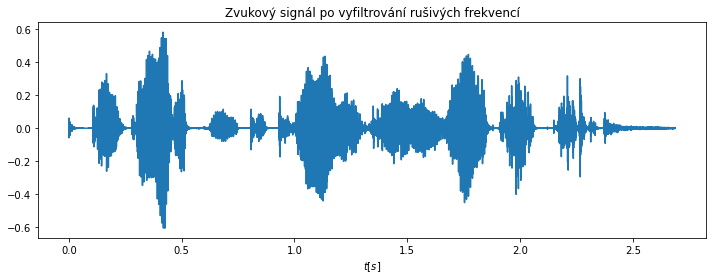

In [34]:
# zobrazení signálu
plt.figure(figsize=(10,4))
plt.plot(t, data)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál po vyfiltrování rušivých frekvencí')
plt.tight_layout()

### Discord @Ave #6666, Díky za projekt! :feelshappyman: